In [2]:
import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
import pandas as pd # Data frame 
import numpy as np # Data Calculation 
from scipy import stats

############# Data Visualization ###############
import seaborn as sns  
import matplotlib.pyplot as plt 

#################### Model #####################
import statsmodels.api as sm # 
from statsmodels.stats import diagnostic as diag 
from sklearn.model_selection import train_test_split # data partition
%matplotlib inline
import os

In [18]:
df=pd.read_csv(r"C:\Users\User\Desktop\ML\linear regresion file\Fish_dataset.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [19]:
dr=df.groupby('Species').mean()
dr

,Weight,Length1,Length2,Length3,Height,Width
Species,,,,,,
Bream,617.828571,30.305714,33.108571,38.354286,15.183211,5.427614
Parkki,154.818182,18.727273,20.345455,22.790909,8.962427,3.220736
Perch,382.239286,25.735714,27.892857,29.571429,7.861870,4.745723
Pike,718.705882,42.476471,45.482353,48.717647,7.713771,5.086382
Roach,152.050000,20.645000,22.275000,24.970000,6.694795,3.657850
Smelt,11.178571,11.257143,11.921429,13.035714,2.209371,1.340093
Whitefish,531.000000,28.800000,31.316667,34.316667,10.027167,5.473050


In [20]:
dc=df.Species.value_counts()
dc


Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [21]:
data={'Species':['Perch','Bream','Roach','Pike','Smelt','Parkki','Whitefish'],
     'count':[56,35,20,17,14,11,6]}
data
dcc=pd.DataFrame(data)
dcc


,Species,count
0,Perch,56
1,Bream,35
2,Roach,20
3,Pike,17
4,Smelt,14
5,Parkki,11
6,Whitefish,6


In [22]:
dcon=pd.merge(dr,dcc,on='Species',how='left')
dcon

,Species,Weight,Length1,Length2,Length3,Height,Width,count
0,Bream,617.828571,30.305714,33.108571,38.354286,15.183211,5.427614,35
1,Parkki,154.818182,18.727273,20.345455,22.790909,8.962427,3.220736,11
2,Perch,382.239286,25.735714,27.892857,29.571429,7.861870,4.745723,56
3,Pike,718.705882,42.476471,45.482353,48.717647,7.713771,5.086382,17
4,Roach,152.050000,20.645000,22.275000,24.970000,6.694795,3.657850,20
5,Smelt,11.178571,11.257143,11.921429,13.035714,2.209371,1.340093,14
6,Whitefish,531.000000,28.800000,31.316667,34.316667,10.027167,5.473050,6


<AxesSubplot:xlabel='Species', ylabel='count'>

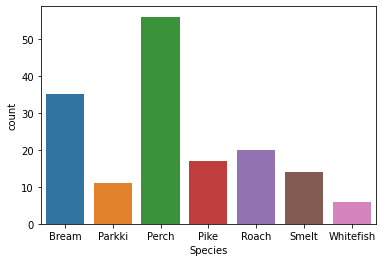

In [23]:
sns.barplot(x='Species',y='count',data=dcon)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [7]:
df=df.drop(['Species'],axis=1)
df


,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


# EDA 

In [5]:
df.isnull().sum()


Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [8]:
def remove_outlier(dp):
                for i in dp.columns:
                    q1 = dp[i].quantile(0.25)
                    q3 = dp[i].quantile(0.75)
                    iqr = q3-q1 #Interquartile range
                    upper_limit = q3+1.5*iqr #acceptable range
                    lower_limit = q3-1.5*iqr
                    if ((dp[i].dtype=='float64')| (dp[i].dtype=='int64')):
                        dp[i][dp[i]>=upper_limit]=upper_limit
                        dp[i][dp[i]<=lower_limit]=lower_limit
                    else:
                        dp[i]=dp[i]
                return (dp)
remove_outlier(df)

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.200,25.40,30.0,11.52000,4.020000
1,290.0,24.000,26.30,31.2,12.48000,4.305600
2,340.0,23.900,26.50,31.1,12.37780,4.696100
3,363.0,26.300,29.00,33.5,12.73000,4.455500
4,430.0,26.500,29.00,34.0,12.44400,5.134000
...,...,...,...,...,...,...
154,12.2,12.225,13.75,14.9,2.73425,2.286225
155,13.4,12.225,13.75,14.9,2.73425,2.286225
156,12.2,12.225,13.75,14.9,2.73425,2.286225
157,19.7,13.200,14.30,15.2,2.87280,2.286225


In [9]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,395.401887,26.305975,28.548742,31.418239,9.023239,4.508236
std,348.555952,9.574840,10.174044,11.200027,4.204325,1.533913
min,0.000000,12.225000,13.750000,14.900000,2.734250,2.286225
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1445.000000,53.175000,57.250000,64.400000,18.957000,8.142000


In [10]:
dr=np.sqrt(df[['Weight']])
dr
dr=dr.rename({'Weight':'sqrtWeight'},axis=1)
dr


,sqrtWeight
0,15.556349
1,17.029386
2,18.439089
3,19.052559
4,20.736441
...,...
154,3.492850
155,3.660601
156,3.492850
157,4.438468


In [11]:
dt=pd.concat([df,dr],axis=1)
dt

,Weight,Length1,Length2,Length3,Height,Width,sqrtWeight
0,242.0,23.200,25.40,30.0,11.52000,4.020000,15.556349
1,290.0,24.000,26.30,31.2,12.48000,4.305600,17.029386
2,340.0,23.900,26.50,31.1,12.37780,4.696100,18.439089
3,363.0,26.300,29.00,33.5,12.73000,4.455500,19.052559
4,430.0,26.500,29.00,34.0,12.44400,5.134000,20.736441
...,...,...,...,...,...,...,...
154,12.2,12.225,13.75,14.9,2.73425,2.286225,3.492850
155,13.4,12.225,13.75,14.9,2.73425,2.286225,3.660601
156,12.2,12.225,13.75,14.9,2.73425,2.286225,3.492850
157,19.7,13.200,14.30,15.2,2.87280,2.286225,4.438468


In [12]:
dt=dt.drop('Weight',axis=1)
dt

,Length1,Length2,Length3,Height,Width,sqrtWeight
0,23.200,25.40,30.0,11.52000,4.020000,15.556349
1,24.000,26.30,31.2,12.48000,4.305600,17.029386
2,23.900,26.50,31.1,12.37780,4.696100,18.439089
3,26.300,29.00,33.5,12.73000,4.455500,19.052559
4,26.500,29.00,34.0,12.44400,5.134000,20.736441
...,...,...,...,...,...,...
154,12.225,13.75,14.9,2.73425,2.286225,3.492850
155,12.225,13.75,14.9,2.73425,2.286225,3.660601
156,12.225,13.75,14.9,2.73425,2.286225,3.492850
157,13.200,14.30,15.2,2.87280,2.286225,4.438468


# Data partition


In [13]:
x=dt[['Length1','Length2','Length3','Height','Width']]
y=dt[['sqrtWeight']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,train_size=0.7,random_state=100)
train0 = pd.concat([X_train,y_train], axis=1)
train0

,Length1,Length2,Length3,Height,Width,sqrtWeight
6,26.8,29.7,34.5,14.1795,5.2785,22.360680
25,31.8,35.0,40.9,16.3600,6.0532,26.925824
21,31.4,34.0,39.2,15.9936,5.3704,26.172505
75,15.0,16.2,17.2,4.5924,2.6316,7.176350
84,19.0,21.0,22.5,5.6925,3.6675,11.180340
...,...,...,...,...,...,...
87,20.0,22.0,23.5,5.6400,3.5250,10.954451
103,25.4,27.5,28.9,7.1672,4.3350,16.124515
67,19.0,20.7,23.2,9.3960,3.4104,13.038405
24,31.9,35.0,40.5,16.2405,5.5890,26.457513


<AxesSubplot:xlabel='Length3', ylabel='sqrtWeight'>

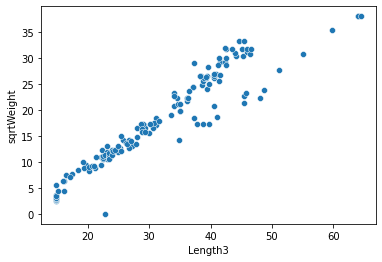

In [14]:
sns.scatterplot(x='Length3',y='sqrtWeight',data=dt)

In [63]:
train0.corr()

,Length1,Length2,Length3,Height,Width,sqrtWeight
Length1,1.000000,0.999580,0.992376,0.610076,0.865596,0.945124
Length2,0.999580,1.000000,0.994166,0.620233,0.867918,0.948122
Length3,0.992376,0.994166,1.000000,0.673294,0.863078,0.956062
Height,0.610076,0.620233,0.673294,1.000000,0.756057,0.793763
Width,0.865596,0.867918,0.863078,0.756057,1.000000,0.950028
sqrtWeight,0.945124,0.948122,0.956062,0.793763,0.950028,1.000000


# sqrtweight has a correlation to L1,L2,L3,height,width

# model builiding

In [66]:
import statsmodels.formula.api as smf
model = smf.ols('sqrtWeight ~Length1+Height+Width', data=train0).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sqrtWeight   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     2366.
Date:                Tue, 24 May 2022   Prob (F-statistic):           1.27e-97
Time:                        16:23:40   Log-Likelihood:                -168.27
No. Observations:                 111   AIC:                             344.5
Df Residuals:                     107   BIC:                             355.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.3507      0.333    -25.056      0.000      -9.011      -7.690
Length1        0.4929      0.022     22.345      0.000       0.449       0.537
Height         0.5178      0.041     12.725      0.000       0.437       0.598
Width          1.8760      0.171     10.992      0.000       1.538       2.214
==============================================================================
Omnibus:                       16.183   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.531
Skew:                           0.138   Prob(JB):                     5.89e-15
Kurtosis:                       6.754   Cond. No.                         94.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# all variable have p value less than 0.05 


# Accuracy of Model is 98.5% lets check VIF and on test data. 

# Vif checking


In [50]:
X1=df.loc[:,['Length1','Height']]
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])], 
                          index=X1.columns)
series_before

Length1    8.521285
Height     8.521285
dtype: float64

In [70]:
X1=df.loc[:,['Length1','Height']]
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])], 
                          index=X1.columns)
series_before

Length1    8.872599
Height     8.872599
dtype: float64

In [15]:
import statsmodels.formula.api as smf
model = smf.ols('sqrtWeight ~Length1+Height', data=train0).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sqrtWeight   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     1654.
Date:                Tue, 31 May 2022   Prob (F-statistic):           9.96e-82
Time:                        20:03:07   Log-Likelihood:                -210.21
No. Observations:                 111   AIC:                             426.4
Df Residuals:                     108   BIC:                             434.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.1487      0.457    -15.633      0.000      -8.055      -6.242
Length1        0.6820      0.020     33.993      0.000       0.642       0.722
Height         0.7748      0.048     16.018      0.000       0.679       0.871
==============================================================================
Omnibus:                       10.154   Durbin-Watson:                   2.168
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               24.783
Skew:                          -0.096   Prob(JB):                     4.15e-06
Kurtosis:                       5.307   Cond. No.                         87.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# This above is the final model ,as length1 and height gives VIF less than 10 and also a accuracy of 96.8%

# y=-8.3507 + 0.6820*Lenght1 +0.0.7748*Height

# Assumption of Model

* Linearity
* Homoscedasicity
* Normality
* Model Error has to be independently identificaly Distibuted

<AxesSubplot:xlabel='sqrtWeight', ylabel='Length1'>

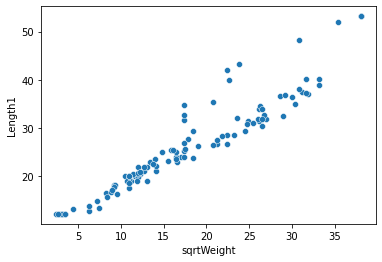

In [71]:
sns.scatterplot(x='sqrtWeight', y='Length1',data=train0)

In [75]:
train0['fitted_value']=model.fittedvalues # prediction  or fitted value
train0['residual']=model.resid  # error or residual

train0.head()

,Length1,Length2,Length3,Height,Width,sqrtWeight,fitted_value,residual
6,26.8,29.7,34.5,14.1795,5.2785,22.360680,22.105053,0.255627
25,31.8,35.0,40.9,16.3600,6.0532,26.925824,27.152208,-0.226384
21,31.4,34.0,39.2,15.9936,5.3704,26.172505,25.484356,0.688148
75,15.0,16.2,17.2,4.5924,2.6316,7.176350,6.358427,0.817923
84,19.0,21.0,22.5,5.6925,3.6675,11.180340,10.843223,0.337117


<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

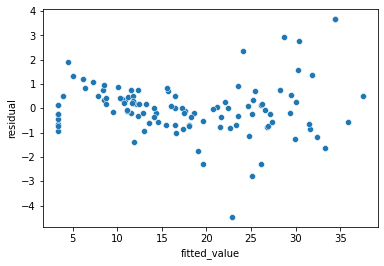

In [74]:
sns.scatterplot(x='fitted_value', y='residual',data=train0)

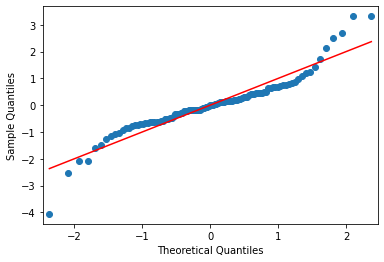

In [76]:
fig = sm.qqplot(train0['residual'], fit=True, line='s') 

# s indicate standardized line
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


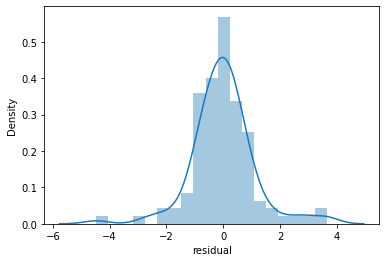

In [77]:
ax = sns.distplot(train0.residual) 

# Prediction on Test Data (unseen data) test

In [78]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,Length1,Length2,Length3,Height,Width,sqrtWeight
45,20.5,22.5,25.3,7.0334,3.8203,12.649111
11,28.7,31.0,36.2,14.3714,4.8146,22.360680
127,41.1,44.0,46.6,12.4888,7.5958,31.622777
15,29.4,32.0,37.2,15.4380,5.5800,24.494897
7,27.6,30.0,35.0,12.6700,4.6900,19.748418


In [90]:
test['Predicted']=model.predict(test)

test.head()
test['original_predicted_Weight']=test['Predicted']**2
test
test['given_Weight']=df['Weight']
test

,Length1,Length2,Length3,Height,Width,sqrtWeight,Predicted,Error,Square_Error,original_prediction_Weight,original_predicted_Weight,given_Weight
45,20.500,22.50,25.3,7.03340,3.820300,12.649111,12.563618,0.085493,0.007309,157.844487,157.844487,160.0
11,28.700,31.00,36.2,14.37140,4.814600,22.360680,22.270729,0.089950,0.008091,495.985384,495.985384,500.0
127,41.100,44.00,46.6,12.48880,7.595800,31.622777,32.626071,-1.003294,1.006599,1064.460498,1064.460498,1000.0
15,29.400,32.00,37.2,15.43800,5.580000,24.494897,24.603988,-0.109090,0.011901,605.356220,605.356220,600.0
7,27.600,30.00,35.0,12.67000,4.690000,19.748418,20.613751,-0.865333,0.748801,424.926718,424.926718,390.0
114,34.500,37.00,39.4,10.83500,6.264600,26.457513,26.018916,0.438597,0.192367,676.983998,676.983998,700.0
139,44.800,48.00,51.2,7.68000,5.376000,27.748874,27.795578,-0.046704,0.002181,772.594167,772.594167,770.0
1,24.000,26.30,31.2,12.48000,4.305600,17.029386,18.019614,-0.990228,0.980551,324.706499,324.706499,290.0
155,12.225,13.75,14.9,2.73425,2.286225,3.660601,3.380417,0.280184,0.078503,11.427219,11.427219,13.4
51,23.600,25.20,27.9,7.08660,3.906000,13.416408,14.280076,-0.863668,0.745923,203.920580,203.920580,180.0


In [91]:
test['Error']=test.sqrtWeight-test.Predicted
test['Square_Error']=(test.Error)*(test.Error)
test

,Length1,Length2,Length3,Height,Width,sqrtWeight,Predicted,Error,Square_Error,original_prediction_Weight,original_predicted_Weight,given_Weight
45,20.500,22.50,25.3,7.03340,3.820300,12.649111,12.563618,0.085493,0.007309,157.844487,157.844487,160.0
11,28.700,31.00,36.2,14.37140,4.814600,22.360680,22.270729,0.089950,0.008091,495.985384,495.985384,500.0
127,41.100,44.00,46.6,12.48880,7.595800,31.622777,32.626071,-1.003294,1.006599,1064.460498,1064.460498,1000.0
15,29.400,32.00,37.2,15.43800,5.580000,24.494897,24.603988,-0.109090,0.011901,605.356220,605.356220,600.0
7,27.600,30.00,35.0,12.67000,4.690000,19.748418,20.613751,-0.865333,0.748801,424.926718,424.926718,390.0
114,34.500,37.00,39.4,10.83500,6.264600,26.457513,26.018916,0.438597,0.192367,676.983998,676.983998,700.0
139,44.800,48.00,51.2,7.68000,5.376000,27.748874,27.795578,-0.046704,0.002181,772.594167,772.594167,770.0
1,24.000,26.30,31.2,12.48000,4.305600,17.029386,18.019614,-0.990228,0.980551,324.706499,324.706499,290.0
155,12.225,13.75,14.9,2.73425,2.286225,3.660601,3.380417,0.280184,0.078503,11.427219,11.427219,13.4
51,23.600,25.20,27.9,7.08660,3.906000,13.416408,14.280076,-0.863668,0.745923,203.920580,203.920580,180.0


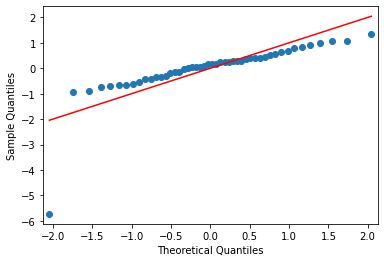

In [82]:
fig = sm.qqplot(test['Error'], fit=True, line='s') 

# s indicate standardized line
plt.show()

<AxesSubplot:xlabel='Predicted', ylabel='Error'>

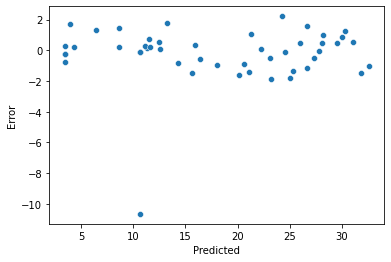

In [83]:
sns.scatterplot(x='Predicted', y='Error',data=test)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


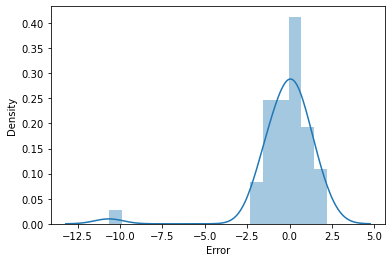

In [84]:
ax = sns.distplot(test.Error) 

In [86]:
import math
rmse = math.sqrt(np.mean(test.Square_Error))
rmse**2

3.3647752959467336

# y=-8.3507 + 0.6820*Lenght1 +0.7748*Height with RMSE less than 10 on test.